In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000831001"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000831001
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,CITIGROUP INC
Ticker,C


In [5]:
prelims = query_prelims(cik)

C:\ProgramData\Miniconda3\lib\site-packages\sqlalchemy\sql\sqltypes.py:665: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  "storage." % (dialect.name, dialect.driver)


# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,67.0,4.585701e+01,2.599468e+01,5.280000e+00,2.092500e+01,6.157000e+01,6.705000e+01,7.881000e+01
interest income,66.0,1.760141e+10,5.988255e+09,6.262000e+09,1.475375e+10,1.628100e+10,1.902575e+10,3.296100e+10
net income,60.0,1.924600e+09,4.335920e+09,-1.829900e+10,1.196000e+09,3.390000e+09,4.296500e+09,6.226000e+09
net interest income,57.0,1.198711e+10,9.168186e+08,9.828000e+09,1.147900e+10,1.191300e+10,1.215700e+10,1.456100e+10
provision for loan losses,67.0,3.389746e+09,2.654086e+09,1.386000e+09,1.793000e+09,2.146000e+09,3.499500e+09,1.223300e+10
total revenue,67.0,2.007422e+10,1.148141e+10,4.000000e+03,1.755150e+10,1.869200e+10,2.174650e+10,7.967100e+10


# Plots

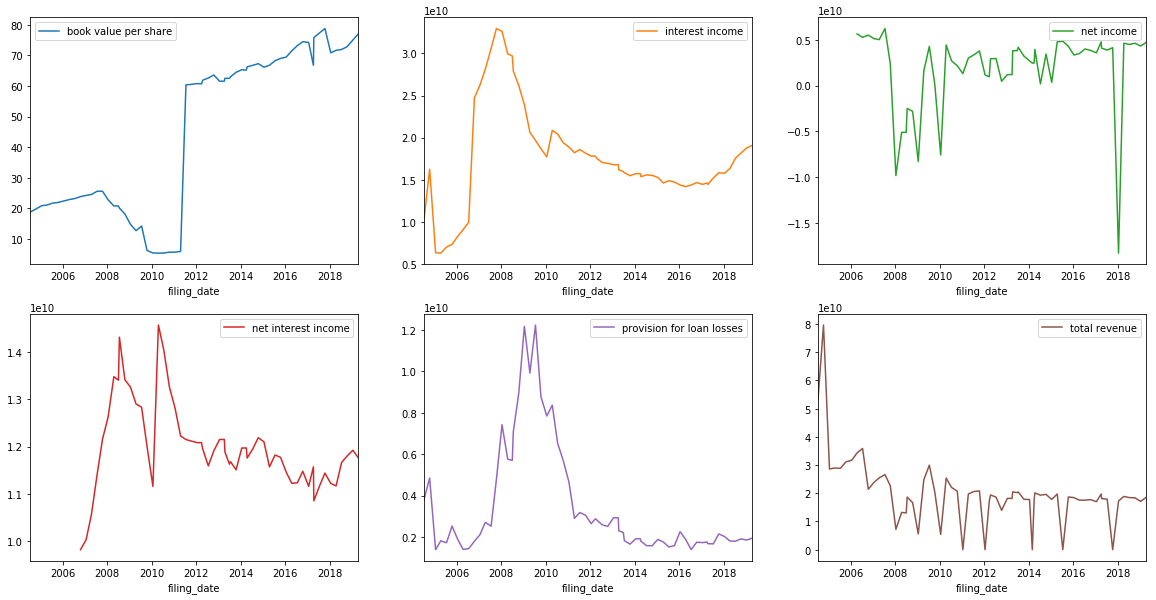

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                          
0000831001 net income           2004Q2 to 2005Q4: 7 periods    missing   
           net interest income  2004Q2 to 2006Q2: 9 periods    missing   
           total revenue                             2011Q4  duplicate   
           total revenue                             2013Q4  duplicate   

                                         message  
cik        item                                   
0000831001 net income             Missing period  
           net interest income    Missing period  
           total revenue        Duplicate period  
           total revenue        Duplicate period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()